In [1]:
import pandas as pd
loan=pd.read_csv('../cleanned_loan.csv')
pd.set_option('display.max_columns', None)

In [3]:
X=loan.drop(columns=['loan_status','loan_status_grouped','emp_title','title','issue_d','grade'])
y=loan['loan_status_grouped']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def sub_grades_encoding(x):
    grade_mapping = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
    number_mapping = {'1': 0.8, '2': 0.6, '3': 0.4, '4': 0.2, '5': 0.0}
    
    val = grade_mapping.get(x[0], 0) + number_mapping.get(x[1], 0)
    return val

In [5]:
X['sub_grade']= X['sub_grade'].apply(sub_grades_encoding)

In [6]:
#Separate numerical and non-numerical columns
ordinal_columns = ['emp_length','purpose']
categorical_columns = ['home_ownership', 'term']
numerical_columns = X.select_dtypes(include=['float64']).columns

# Apply Label Encoding to ordinal columns before splitting
le = LabelEncoder()
for col in ordinal_columns:
    X[col] = le.fit_transform(X[col])

# Apply OneHotEncoding to categorical columns before splitting
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Now perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Ensure the train and test sets have the same structure (dummies already handled)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Apply scaling to numerical columns
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

ValueError: x and y must have same first dimension, but have shapes (30,) and (19,)

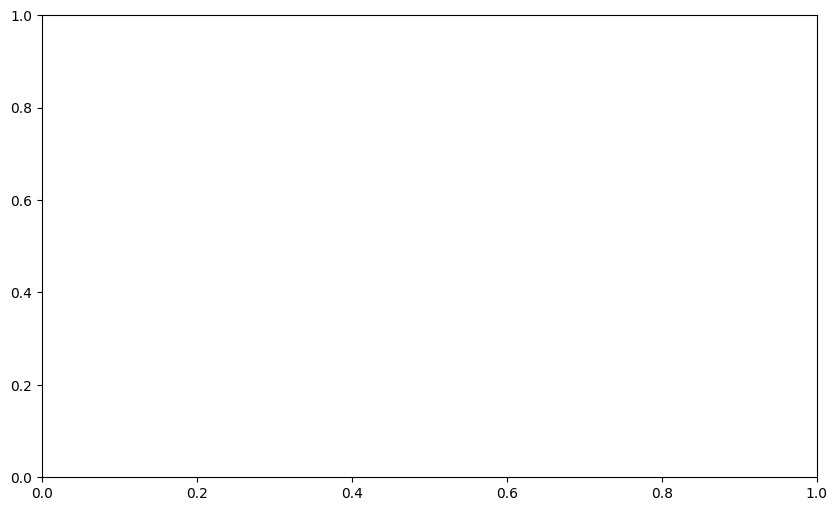

In [12]:
error_rate = []
for k in range(1 ,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, y_pred))  # 1 - accuracy = error rate


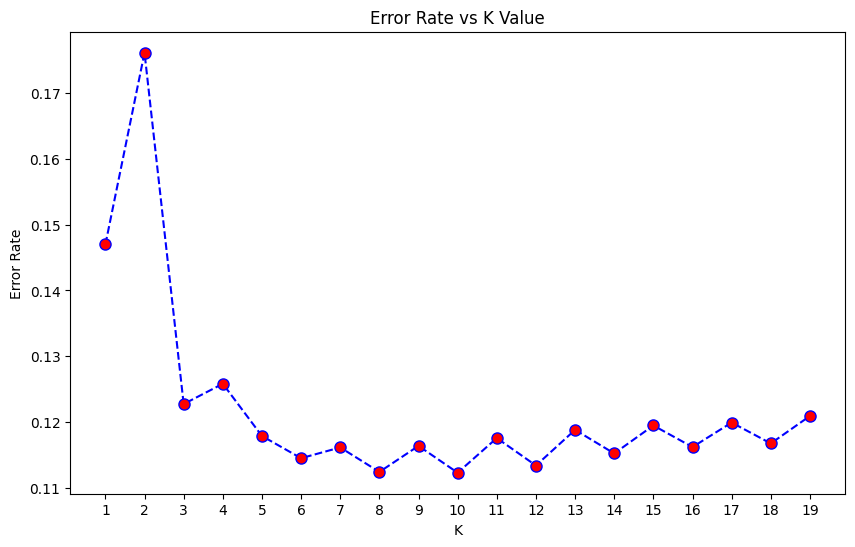

In [18]:
# Plotting the error rate vs k values
import numpy as np
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(np.arange(1, 20, 1))
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print("Classification Report :")
print(     classification_report(y_test,pred_knn))

Classification Report :
              precision    recall  f1-score   support

         0.0       0.88      0.51      0.64     10809
         1.0       0.88      0.98      0.93     40517

    accuracy                           0.88     51326
   macro avg       0.88      0.74      0.79     51326
weighted avg       0.88      0.88      0.87     51326

